## Objective:

The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

In [396]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [398]:
import warnings
warnings.filterwarnings('ignore') # to prevent warning msgs

## IMPORTING DATASET

In [400]:
dataset=pd.read_csv('Employee.csv')

In [402]:
df=pd.DataFrame(dataset)
print("Original dataset:")
print(df.head())

Original dataset:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [406]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


## Data Cleaning: (Score : 2)
## Find the missing and inappropriate values, treat them appropriately.
## Remove all duplicate rows.
## Find the outliers.
## Replace the value 0 in age as NaN
## Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

## Finding Missing Data and Duplicates

In [35]:
df.isnull()

,Company,Age,Salary,Place,Country,Gender
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
143,False,False,False,False,False,False
144,False,False,False,False,False,False
145,False,False,False,False,False,False
146,False,False,False,False,False,False


In [37]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [416]:
df['Company'].isnull().sum()

8

In [418]:
df['Company'].fillna('Unknown', inplace=True)

In [420]:
df['Company'].isnull().sum()

0

## Replace the value 0 in age as NaN

In [422]:
print("Number of zeros in 'Age' before replacement:", (df['Age'] == 0).sum())
df['Age'] = df['Age'].replace(0, np.NaN)
print("Number of NaN values in 'Age' after replacement:", df['Age'].isna().sum())   #counts the NaN values to confirm the change

Number of zeros in 'Age' before replacement: 0
Number of NaN values in 'Age' after replacement: 24


In [424]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['Salary']

0      5000.0
1      5000.0
2      2300.0
3      3000.0
4      4000.0
        ...  
143    9024.0
144    8787.0
145    4034.0
146    5034.0
147    8202.0
Name: Salary, Length: 148, dtype: float64

In [426]:
df['Place'].fillna('Unknown', inplace=True)

In [428]:
df.isnull().sum()

Company     0
Age        24
Salary      0
Place       0
Country     0
Gender      0
dtype: int64

## Handle NaN Values

<Axes: xlabel='Age', ylabel='Density'>

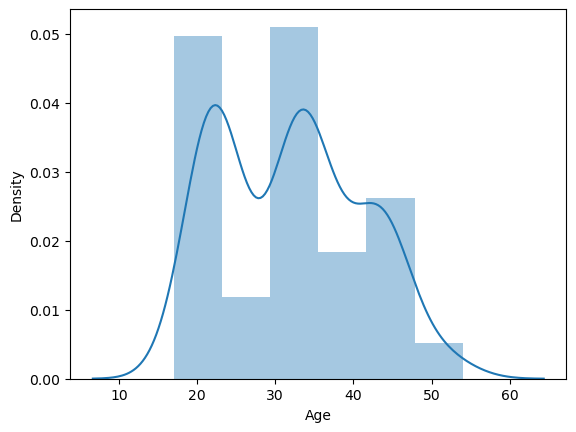

In [430]:
sns.distplot(df['Age'])

## Note : Since the data is slightly skewed median will be better option

In [432]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [434]:
print(df.isnull().sum()) 

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [302]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
142    False
143    False
145    False
146    False
147    False
Length: 144, dtype: bool

In [308]:
df.duplicated().sum()

0

## Numerical columns and Categorical columns identified

In [447]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [449]:
print('numerical_columns:',numerical_columns)

numerical_columns: Index(['Age', 'Salary', 'Gender'], dtype='object')


In [451]:
print('categorical_columns:',categorical_columns)

categorical_columns: Index(['Company', 'Place', 'Country'], dtype='object')


In [445]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Exploration: (Score : 1)
## Explore the data, list down the unique values in each feature and find its length.

In [316]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print(f"Number of unique values in {column}: {len(unique_values)}\n")

Unique values in Company_Name: [4 2 0 6 5 1 3]
Number of unique values in Company_Name: 7

Unique values in Age: [20.         30.         35.         40.         23.         30.48461538
 34.         45.         18.         22.         32.         37.
 50.         21.         46.         36.         26.         41.
 24.         25.         43.         19.         38.         51.
 31.         44.         33.         17.         54.        ]
Number of unique values in Age: 29

Unique values in Salary: [5000. 2300. 3000. 4000. 6000. 7000. 8000. 9000. 1089. 1234. 3030. 3045.
 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934. 4034.
 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787. 3454.
 5654. 5009. 5098. 3033.]
Number of unique values in Salary: 40

Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Unknown'
 'Noida' 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values in Place: 12

Unique values in Country: [0]
Nu

## Perform the statistical analysis and renaming of the columns.

In [318]:
print(df.describe()) # describe() - to get a summary of the statistics for numerical features

       Company_Name         Age       Salary  Country
count    144.000000  144.000000   144.000000    144.0
mean       2.500000   31.855823  5238.194444      0.0
std        1.797434    8.250046  2370.641804      0.0
min        0.000000   17.000000  1089.000000      0.0
25%        1.000000   23.750000  3045.000000      0.0
50%        2.000000   32.000000  5000.000000      0.0
75%        4.000000   36.000000  7084.000000      0.0
max        6.000000   54.000000  9876.000000      0.0


In [320]:
print(df.describe(include = 'object')) # For categorical features, use describe(include='object')

         Place
count      144
unique      12
top     Mumbai
freq        34


## Renaming Columns

In [463]:
df.rename(columns={
    'Company': 'Company_Name'
}, inplace=True)


In [465]:
df['Company_Name']

0          TCS
1      Infosys
2          TCS
3      Infosys
4          TCS
        ...   
143        TCS
144    Infosys
145    Infosys
146        TCS
147    Infosys
Name: Company_Name, Length: 148, dtype: object

## Convert Gender column to a categorical data type

In [326]:
df['Gender'] = df['Gender'].astype('category')

In [328]:
print(df['Gender'].dtype)

category


## Finding and Treating Outliers

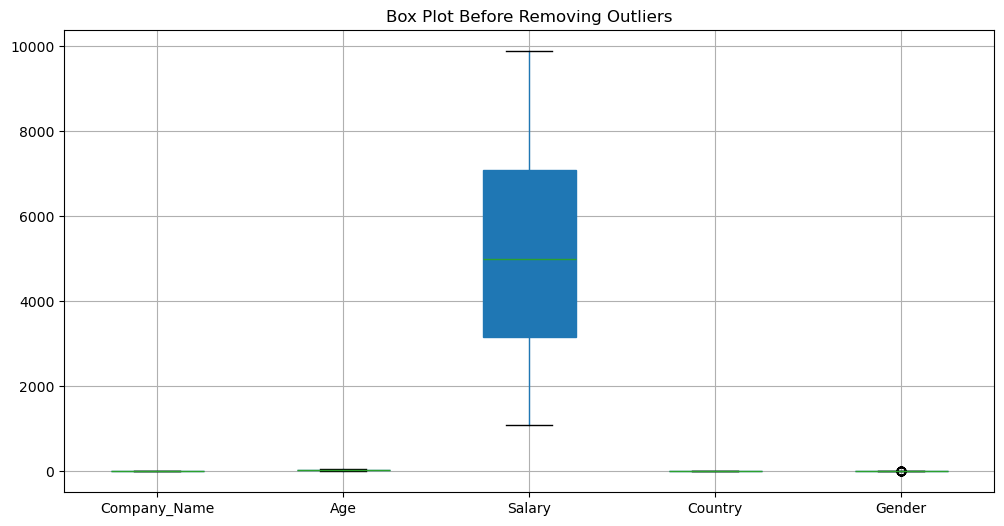

In [549]:
# Box plot before removing outliers
df.select_dtypes(include='number').boxplot(figsize=(12, 6), patch_artist=True)
plt.title("Box Plot Before Removing Outliers")
plt.show()

## Identify Outliers - IQR METHOD

In [551]:

for column in df.select_dtypes(include='number').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {outliers.shape[0]}")


Number of outliers in Company_Name: 0
Number of outliers in Age: 0
Number of outliers in Salary: 0
Number of outliers in Country: 0
Number of outliers in Gender: 33


## Removed _ Capping

In [555]:
# Capping outliers to the lower and upper bounds
df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

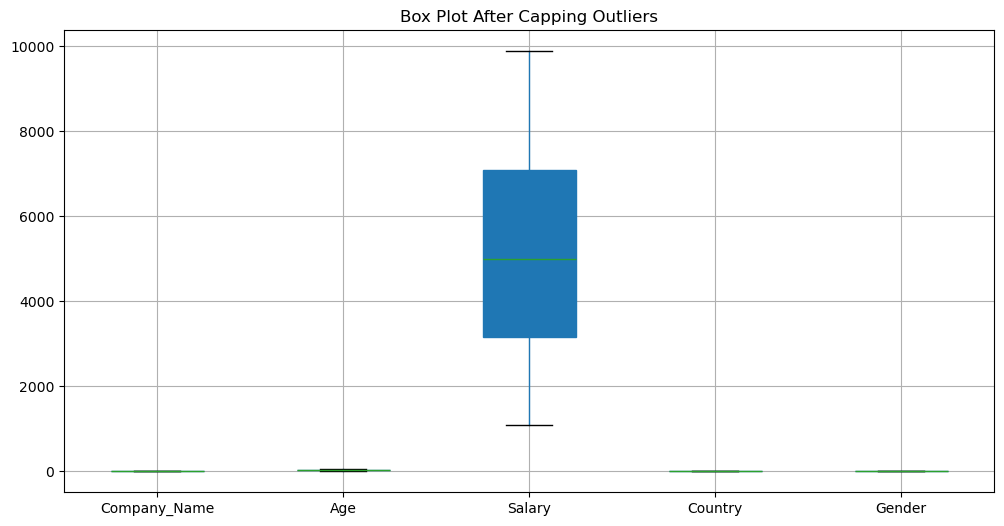

In [557]:
# Box plot after capping outliers
df.select_dtypes(include='number').boxplot(figsize=(12, 6), patch_artist=True)
plt.title("Box Plot After Capping Outliers")
plt.show()

## Data Analysis: (Score : 2)
## Filter the data with age >40 and salary<5000

In [336]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company_Name,Age,Salary,Place,Country,Gender
21,2,50.0,3184.0,Delhi,0,0
32,2,45.0,4034.0,Calcutta,0,0
39,2,41.0,3000.0,Mumbai,0,0
50,2,41.0,3000.0,Chennai,0,0
57,2,51.0,3184.0,Hyderabad,0,0
68,2,43.0,4034.0,Mumbai,0,0
75,2,44.0,3000.0,Cochin,0,0
86,2,41.0,3000.0,Delhi,0,0
93,2,54.0,3184.0,Mumbai,0,0
104,2,44.0,4034.0,Delhi,0,0


## Plot the chart with age and salary

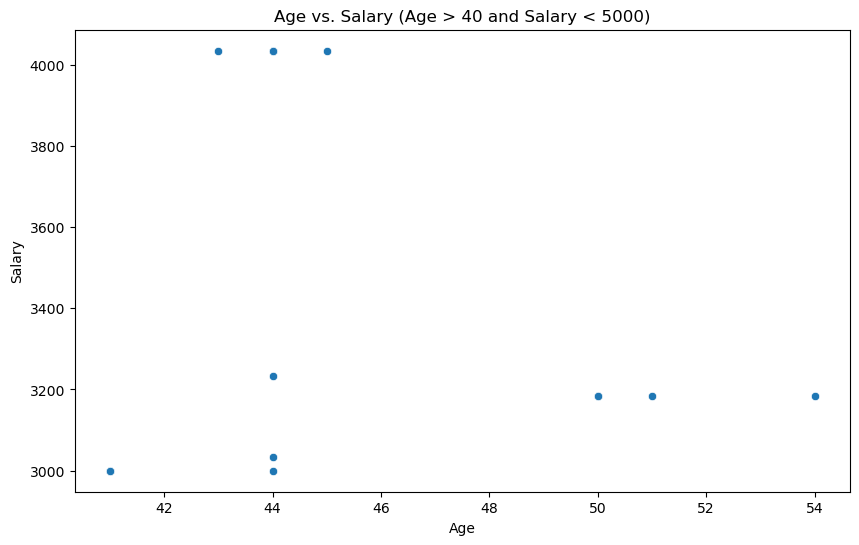

In [180]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=filtered_data)
plt.title("Age vs. Salary (Age > 40 and Salary < 5000)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


## Count the number of people from each place and represent it visually

In [340]:
# Count the number of people from each place
place_counts = df['Place'].value_counts()
place_counts


Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Unknown       14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

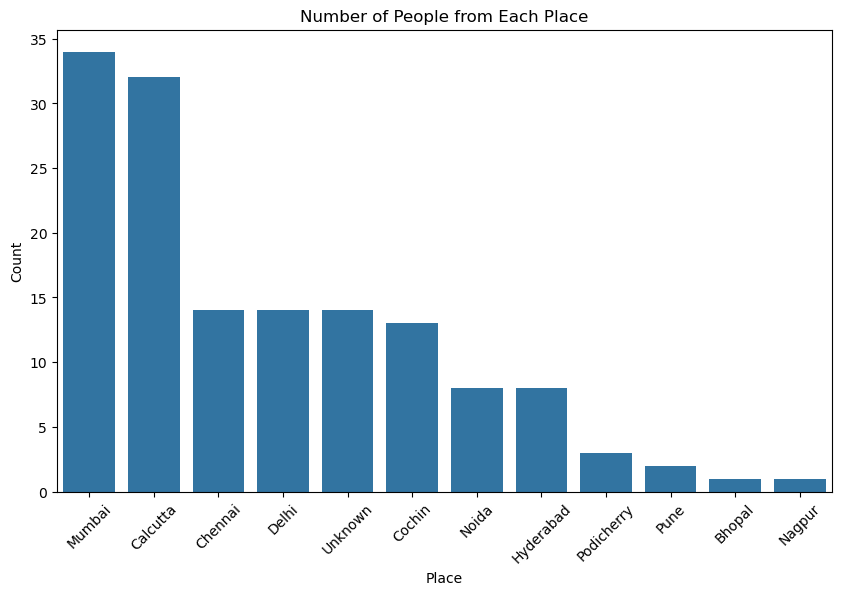

In [342]:
# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

## Data Encoding: (Score : 2)
## Convert categorical variables into numerical representations using techniques such as 
## one-hot encoding,label encoding, making them suitable for analysis by machine learning algorithms.

In [471]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

## Numerical Columns

In [473]:
print('numerical_columns:',numerical_columns)

numerical_columns: Index(['Age', 'Salary', 'Gender'], dtype='object')


## Categorical Columns

In [475]:
print('categorical_columns:',categorical_columns)

categorical_columns: Index(['Company_Name', 'Place', 'Country'], dtype='object')


## Label Encoding

In [477]:
Label_Encoder=LabelEncoder() #label encoding convert categorical to numerical

In [479]:
df['Company_Name'] = Label_Encoder.fit_transform(df['Company_Name'])
df['Country'] = Label_Encoder.fit_transform(df['Country'])

In [481]:
print(df[['Company_Name']].head())

   Company_Name
0             4
1             2
2             4
3             2
4             4


In [483]:
print(df[['Country']].head())

   Country
0        0
1        0
2        0
3        0
4        0


## One-Hot Encoding

In [519]:

oneHot = OneHotEncoder(sparse_output=False)  # Use sparse=False to return a dense array

place_encoded = oneHot.fit_transform(df[['Place']])
place_columns = oneHot.get_feature_names_out(['Place'])

# Droping the original 'Place' column and concatenate the one-hot encoded columns
df_onehot = pd.concat([
    df.drop('Place', axis=1),  # Drop the original 'Place' column
    pd.DataFrame(place_encoded, columns=place_columns)  # Add the one-hot encoded columns
], axis=1)



In [521]:
df_onehot.head()

,Company_Name,Age,Salary,Country,Gender,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Place_Unknown
0,4,20.0,5000.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,30.0,5000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4,35.0,2300.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,40.0,3000.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,23.0,4000.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## y is target variable (dependent variable)

In [523]:
y=df_onehot['Salary']

In [525]:
y

0      5000.0
1      5000.0
2      2300.0
3      3000.0
4      4000.0
        ...  
143    9024.0
144    8787.0
145    4034.0
146    5034.0
147    8202.0
Name: Salary, Length: 148, dtype: float64

In [531]:
# x = df_onehot.drop(['Salary', 'Company_Name', 'Country'], axis=1)

In [561]:
x = df_onehot.drop(['Salary'], axis=1)

In [563]:
x

,Company_Name,Age,Country,Gender,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Place_Unknown
0,4,20.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,30.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4,35.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,40.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,23.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,4,33.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,2,22.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,2,44.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,4,33.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [565]:
print(x.isnull().sum())  # Should show 0 if no `NaN` values exist
print(y.isnull().sum())  # Should also show 0 if no `NaN` values exist

Company_Name        0
Age                 0
Country             0
Gender              0
Place_Bhopal        0
Place_Calcutta      0
Place_Chennai       0
Place_Cochin        0
Place_Delhi         0
Place_Hyderabad     0
Place_Mumbai        0
Place_Nagpur        0
Place_Noida         0
Place_Podicherry    0
Place_Pune          0
Place_Unknown       0
dtype: int64
0


## Feature Scaling: (Score : 2)
## After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

## Feature Selection Using VarianceThreshold


In [567]:
# 1.1 Variance Threshold
var_threshold = VarianceThreshold(threshold=0.1)
X_var = var_threshold.fit_transform(x)
var_selected = x.columns[var_threshold.get_support()].tolist()

print("1. Filter Methods Results:")
print("\na) Variance Threshold")
print(f"Features selected: {len(var_selected)}")
print("Selected features:", var_selected[:5], "...")

1. Filter Methods Results:

a) Variance Threshold
Features selected: 5
Selected features: ['Company_Name', 'Age', 'Gender', 'Place_Calcutta', 'Place_Mumbai'] ...


## scaling

In [569]:
# Create scalers
standard_scaler = StandardScaler()  #standardized : entire data into standard form
minmax_scaler = MinMaxScaler()      # minmax : entire data into normalized form

In [571]:
# Apply different scaling methods
X_standardized = standard_scaler.fit_transform(X_var) 
X_normalized = minmax_scaler.fit_transform(X_var)    

In [573]:
# Convert the scaled arrays back into DataFrames with the original column names
X_standardized_df = pd.DataFrame(X_standardized, columns=var_selected)
X_normalized_df = pd.DataFrame(X_normalized, columns=var_selected)


In [575]:
# now we can visualize or use these DataFrames
print(X_standardized_df.head())
print(X_normalized_df.head())

   Company_Name       Age    Gender  Place_Calcutta  Place_Mumbai
0      0.848436 -1.471033 -0.535683       -0.535683     -0.577350
1     -0.272712 -0.258148 -0.535683       -0.535683      1.732051
2      0.848436  0.348295 -0.535683        1.866775     -0.577350
3     -0.272712  0.954737 -0.535683       -0.535683     -0.577350
4      0.848436 -1.107168 -0.535683       -0.535683      1.732051
   Company_Name       Age  Gender  Place_Calcutta  Place_Mumbai
0      0.666667  0.081081     0.0             0.0           0.0
1      0.333333  0.351351     0.0             0.0           1.0
2      0.666667  0.486486     0.0             1.0           0.0
3      0.333333  0.621622     0.0             0.0           0.0
4      0.666667  0.162162     0.0             0.0           1.0


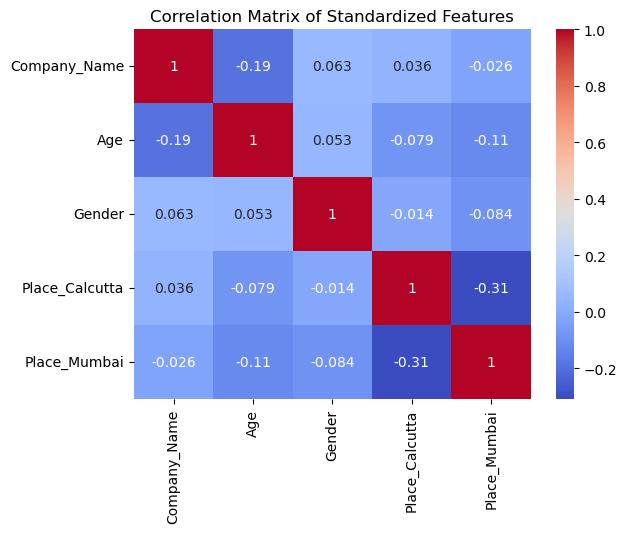

In [577]:
correlation = X_standardized_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Standardized Features")
plt.show()
